In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit import execute

# import basic plot tools
from qiskit.visualization import plot_histogram
from circuit import initialize, data_load, data_super, data_super_reverse, oracle, diffuser
given = [1,5,7,10]
n = 30 
task_circuit = QuantumCircuit(n)




In [2]:
initialize(task_circuit)
data_load(task_circuit, given)


In [3]:
for iterate in range(2):
    data_super(task_circuit)
    oracle(task_circuit)
    data_super_reverse(task_circuit)
    diffuser(task_circuit)

G:\Conda\envs\Qiskit\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


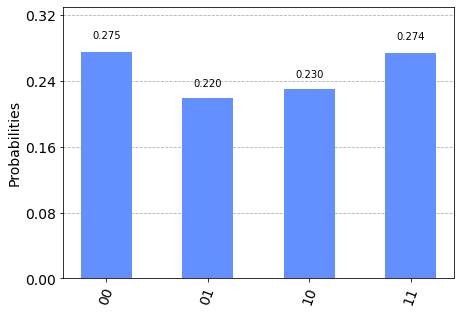

In [4]:
#backend = Aer.get_backend('statevector_simulator')
#result = execute(task_circuit, backend=backend).result()
#result.get_data(task_circuit)
#result.get_statevector(task_circuit)


cr = ClassicalRegister(2,'creg')

task_circuit.add_register(cr)
task_circuit.measure(0,cr[0])
task_circuit.measure(1,cr[1])
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(task_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)
